## **Aim - Design and Implement a Gaussian Mixture Model (GMM) for Outcome Prediction.**

### **Yash Ashok Shirsath BE AI&DS - 40**

Optimal number of components: 3
Accuracy: 98.33%


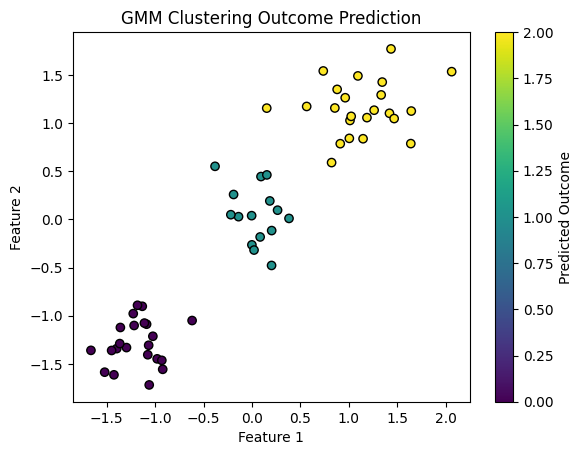

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import mode

np.random.seed(42)
X1 = np.random.normal(loc=[2, 2], scale=1, size=(100, 2))
X2 = np.random.normal(loc=[6, 6], scale=1, size=(100, 2))
X3 = np.random.normal(loc=[10, 10], scale=1, size=(100, 2))
X = np.vstack((X1, X2, X3))
y = np.array([0] * 100 + [1] * 100 + [2] * 100)  # Class labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

bic_scores = []
n_components_range = range(1, 10)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_train)
    bic_scores.append(gmm.bic(X_train))

optimal_n = n_components_range[np.argmin(bic_scores)]
print(f"Optimal number of components: {optimal_n}")
gmm = GaussianMixture(n_components=optimal_n, covariance_type='full', random_state=42)
gmm.fit(X_train)

y_pred_train = gmm.predict(X_train)
y_pred_test = gmm.predict(X_test)

cluster_to_label = {}
for i in range(optimal_n):
    mask = (y_pred_train == i)
    if np.any(mask):  # Ensure mask is not empty
        mode_result = mode(y_train[mask], keepdims=True)
        cluster_to_label[i] = mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
    else:
        cluster_to_label[i] = -1  # Assign a default label in case of empty cluster

y_pred_test_mapped = np.vectorize(cluster_to_label.get)(y_pred_test)

accuracy = accuracy_score(y_test, y_pred_test_mapped)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test_mapped, cmap='viridis', marker='o', edgecolors='k')
plt.title("GMM Clustering Outcome Prediction")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Predicted Outcome")
plt.show()
